<a href="https://colab.research.google.com/github/Shridhar2602/RecSys/blob/main/Pre_Mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

### Read Data and tweaks

In [3]:
DF = pd.read_excel('/content/gdrive/MyDrive/RS/Course Recommendation System(1-128).xlsx')
DF.drop(DF.iloc[:, 0:6], axis=1, inplace=True) # Delete unnecessary columns
# DF.drop_duplicates(keep=False, inplace=True) # Remove duplicate rows
len(DF)

128

In [4]:
DF.head()

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
DF.dropna(inplace=True)

len(DF)
# DF.head()

52

In [6]:
# scaled_df = StandardScaler().fit_transform(DF)

100.5422794117647


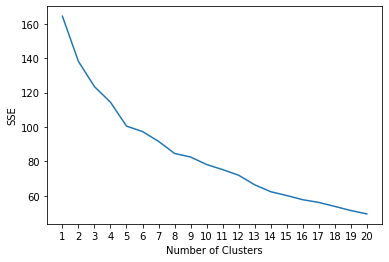

In [7]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(DF)
    if(k == 5):
      print(kmeans.inertia_)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[4 4 1 1 4 1 1 1 0 4 2 2 1 1 3 1 3 1 0 1 1 1 3 3 0 1 3 4 3 0 1 0 1 2 4 1 1
 4 1 2 1 3 1 2 1 1 4 0 3 3 0 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

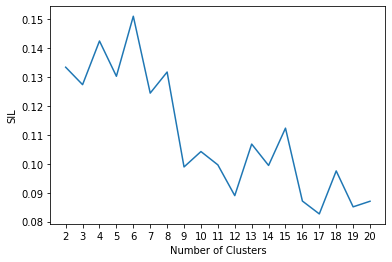

In [8]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(DF)
  labels = kmeans.labels_
  if(k == 5):
    print(kmeans.labels_)
  sil.append(silhouette_score(DF, labels, metric = 'euclidean'))

plt.plot(range(2, 21), sil)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SIL")
plt.show()

Optimal k feels like 5 since there is  a elbow in SSE and Silhoutee score has a peak

In [9]:
# Create a KMeans instance with k=3 clusters
kmeans = my_KMeans(k=5)

# Fit the model to the data
kmeans.fit(DF)

# Predict the cluster labels for the data points
labels = kmeans.predict(DF)

NameError: ignored

In [ ]:
print(labels)

(128, 10)

[1 3 1 3 4 1 2 3 1 1 1 1 1 1 1 1 2 1 3 1 3 1 3 0 1 1 3 2 2 4 3 0 2 0 3 2 1
 1 4 1 3 0 0 1 3 1 1 3 0 3 3 1 2 1 1 4 2 3 1 1 0 3 1 3 2 3 3 3 2 1 3 3 3 1
 0 2 3 1 3 1 3 3 4 1 2 1 3 1 3 4 2 2 1 3 2 0 1 1 3 3 4 2 0 1 4 2 2 0 2 3 1
 2 3 3 0 1 1 1 2 2 4 1 1 2 1 2 1 3]

[3 2 1 0 2 0 1 2 0 0 2 0 2 2 0 2 2 0 0 0 2 0 0 0 2 0 0 1 2 3 3 0 2 4 3 1 2
 0 3 0 0 4 2 2 0 0 0 1 3 0 2 1 1 0 2 3 2 0 0 0 2 2 0 0 1 3 2 2 1 1 0 2 0 2
 3 1 0 2 2 0 3 2 3 1 1 0 4 0 4 3 1 2 2 2 2 2 2 2 2 3 4 0 2 0 0 0 2 3 1 3 1
 1 0 2 4 0 0 2 1 2 2 4 0 1 0 1 1 3]

In [ ]:
# self.adj = defaultdict(list)classification

[1 1 4 2 1 4 4 4 4 3 1 2 3 3 3 0 0 0 0 0 2 2 2 2 2]
(25, 10)

In [10]:
# from sklearn.decomposition import TruncatedSVD
from numpy.linalg import norm

from random import normalvariate
from math import sqrt
data = pd.read_excel('/content/gdrive/MyDrive/RS/Course Recommendation System(1-162).xlsx')

data = data.fillna(0.5)

X = data.drop(data.iloc[:, 0:6], axis=1) # Delete unnecessary columns
X = X.to_numpy()

u, s, vh = np.linalg.svd(X, full_matrices=False)
print(np.allclose(X, np.dot(u * s, vh)))

True


In [11]:
X

array([[0.3 , 0.85, 0.85, ..., 0.5 , 0.5 , 0.5 ],
       [0.7 , 0.8 , 0.2 , ..., 0.5 , 0.5 , 0.5 ],
       [0.7 , 0.  , 1.  , ..., 0.5 , 0.5 , 0.5 ],
       ...,
       [0.6 , 0.3 , 0.4 , ..., 0.5 , 0.5 , 1.  ],
       [0.8 , 0.6 , 0.2 , ..., 0.5 , 0.5 , 0.5 ],
       [0.4 , 0.7 , 0.9 , ..., 0.5 , 0.5 , 0.5 ]])

In [12]:
def gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# def qr_eigen(A, max_iter=1000, tol=1e-6):
#     i = 0
#     Q, R = gram_schmidt(A)

#     while i < max_iter:
#         A = np.dot(Q.T, np.dot(A, Q))

#         if np.amax(np.abs(A)) < tol:
#             break

#         Q, R = gram_schmidt(A)
#         i += 1

#     eigvals = np.diag(A)
#     eigvecs = Q

#     return eigvals, eigvecs

def qr_eigen(A, max_iter=1000, tol=1e-6):

    for i in range(max_iter):
        Q, R = gram_schmidt(A)
        A = np.dot(R, Q)

        if np.amax(np.abs(A)) < tol:
            break

    return np.diag(A), Q

    # https://zerobone.net/blog/cs/gram-schmidt-orthogonalization/

In [13]:
def svd(A):
    m, n = A.shape
 
    ATA = A.T.dot(A)
    eigenvals, V = qr_eigen(ATA)

    idx = eigenvals.argsort()[::-1]
    V = V[:, idx]

    singularvals = np.sqrt(eigenvals[idx])
    S = np.zeros((m, n))
    S[:min(m, n), :min(m, n)] = np.diag(singularvals)

    U = np.zeros((m, m))
    for i in range(min(m, n)):
        if singularvals[i] != 0:
            U[:, i] = A.dot(V[:, i]) / singularvals[i]
    
    if m >= n:
        return U, S, V.T
    else:
        return V, S.T, U.T

In [14]:
u, s, vh=svd(X)

In [15]:
print(u.shape, s.shape, vh.shape)

(162, 162) (162, 25) (25, 25)


In [16]:
print(np.allclose(X, np.dot(u @ s, vh)))

True
